## ML_Assignment_8
1. What exactly is a feature? Give an example to illustrate your point.
2. What are the various circumstances in which feature construction is required?
3. Describe how nominal variables are encoded.
4. Describe how numeric features are converted to categorical features.
5. Describe the feature selection wrapper approach. State the advantages and disadvantages of this approach?
6. When is a feature considered irrelevant? What can be said to quantify it?
7. When is a function considered redundant? What criteria are used to identify features that could be redundant?
8. What are the various distance measurements used to determine feature similarity?
9. State difference between Euclidean and Manhattan distances?
10. Distinguish between feature transformation and feature selection.
11. Make brief notes on any two of the following:
          
      1. SVD (Standard Variable Diameter Diameter)

      2. Collection of features using a hybrid approach

      3. The width of the silhouette
        
      4. Receiver operating characteristic curve

### Ans 1

In machine learning and data analysis, a feature, also known as a variable or attribute, represents a characteristic or property of the data that is used to make predictions or gain insights. Features are the input variables that the model uses to learn patterns, relationships, and information from the data. They play a crucial role in determining a model's performance and its ability to make accurate predictions.

Example:
Let's consider a simple example of predicting house prices based on various features:

In this housing price prediction example, 'SquareFeet,' 'Bedrooms,' 'Bathrooms,' 'Neighborhood,' 'YearBuilt,' and 'Garage' are the features used to predict the 'Price' of a house. These features provide valuable information that the model leverages to make accurate price predictions.

In [2]:
import pandas as pd

# Sample dataset with house features
data = {
    'SquareFeet': [1500, 2000, 1800, 2500, 1400],
    'Bedrooms': [3, 4, 3, 5, 2],
    'Bathrooms': [2, 3, 2, 4, 1],
    'Neighborhood': ['Suburban', 'Urban', 'Suburban', 'Rural', 'Urban'],
    'YearBuilt': [1990, 1985, 1995, 2000, 1975],
    'Garage': [2, 2, 2, 3, 1],
    'Price': [250000, 320000, 280000, 380000, 200000]
}

# Create a DataFrame with the data
df = pd.DataFrame(data)
df

# In this example, the features include 'SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt', and 'Garage'.
# 'Price' is the target variable we want to predict.

# Features are used to build a predictive model that can estimate 'Price' based on these characteristics.

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Garage,Price
0,1500,3,2,Suburban,1990,2,250000
1,2000,4,3,Urban,1985,2,320000
2,1800,3,2,Suburban,1995,2,280000
3,2500,5,4,Rural,2000,3,380000
4,1400,2,1,Urban,1975,1,200000


### Ans 2

Feature construction is required in various circumstances:
1. **Dimensionality Reduction:** Reducing the number of features to improve model efficiency.
2. **Non-linearity:** Transforming features to capture non-linear relationships in the data.
3. **Encoding Categorical Data:** Converting categorical variables into numerical representations.
4. **Feature Scaling:** Scaling features to have similar ranges for algorithms sensitive to scale.
5. **Creating Interaction Terms:** Combining features to capture interactions.
6. **Handling Missing Data:** Creating new features to represent missing data patterns.
7. **Feature Extraction:** Reducing high-dimensional data using techniques like PCA or LDA.
8. **Enhancing Interpretability:** Constructing features to make model outputs more interpretable or domain-specific.

In [3]:
'''We start with a single feature (X) represented as an array
[1, 2, 3, 4, 5]. We use PolynomialFeatures to perform feature
construction, expanding it into polynomial features up to the second
degree. Then, we use StandardScaler to scale the newly created
features to have zero mean and unit variance. Feature construction
allows us to capture non-linear relationships (in this case,
quadratic) and scaling ensures that all features are on the same
scale, which can be crucial for certain machine learning
algorithms.'''

import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Sample data with a single feature
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Feature construction
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

print("Original Data:\n", X)
print("Polynomial Features:\n", X_poly)
print("Scaled Features:\n", X_scaled)

Original Data:
 [[1]
 [2]
 [3]
 [4]
 [5]]
Polynomial Features:
 [[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]
Scaled Features:
 [[ 0.         -1.41421356 -1.15624323]
 [ 0.         -0.70710678 -0.80937026]
 [ 0.          0.         -0.23124865]
 [ 0.          0.70710678  0.57812161]
 [ 0.          1.41421356  1.61874052]]


### Ans 3

Nominal variables, which represent categories or labels without any inherent order, are encoded using techniques like one-hot encoding. In one-hot encoding, each unique category is converted into a binary vector, with each category having its own binary column. A '1' is placed in the column corresponding to the category, while all other columns are filled with '0s'. This encoding preserves the distinction between categories but can increase dimensionality. It's commonly used in machine learning to handle nominal variables, making them suitable for algorithms that require numerical inputs.

In this example, we have a nominal variable 'Color' with different categories (Red, Blue, Green). We use pd.get_dummies() to perform one-hot encoding, creating binary columns for each category. The resulting DataFrame (df_encoded) will have columns like 'Color_Red', 'Color_Blue', and 'Color_Green', where '1' indicates the presence of that color, and '0' indicates the absence. This is a common technique for encoding nominal variables in machine learning.

In [4]:
import pandas as pd

# Sample dataset with a nominal variable 'Color'
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Color'])
df_encoded

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


### Ans 4

Numeric features can be converted to categorical features by discretizing or binning the numerical values into distinct categories or intervals. This process is useful when you want to capture non-linear relationships or transform continuous data into a more interpretable format.

In this example, the 'Age' feature is converted into the categorical 'Age_Category' feature by specifying age intervals (bins) and corresponding labels. This allows us to represent age groups rather than individual ages, making it easier to interpret and analyze.

In [6]:
import pandas as pd

# Sample dataset with a numeric feature 'Age'
data = {
    'Age': [25, 35, 42, 19, 56, 32, 48, 22]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Define age bins and labels
age_bins = [0, 18, 35, 60]
age_labels = ['Youth', 'Adult', 'Senior']

# Convert 'Age' to categorical feature using cut()
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
df[['Age', 'Age_Category']]

,Age,Age_Category
0,25,Adult
1,35,Adult
2,42,Senior
3,19,Adult
4,56,Senior
5,32,Adult
6,48,Senior
7,22,Adult


### Ans 5

The feature selection wrapper approach is a feature selection method that uses a machine learning model's performance as a criterion to select the most relevant subset of features from the original feature set. It involves repeatedly training and evaluating the model with different subsets of features to determine which combination yields the best performance. There are various techniques within the wrapper approach, such as forward selection, backward elimination, and recursive feature elimination (RFE).

**Advantages of the Wrapper Approach:**
1. **Optimizes for Model Performance:** The wrapper approach directly evaluates feature subsets based on their impact on the model's performance, which can result in selecting the most informative features for a specific task.

2. **Handles Feature Interactions:** It can capture complex relationships and feature interactions that may not be apparent when considering individual features.

3. **Customized to Model Choice:** It can be tailored to the specific machine learning algorithm being used, optimizing feature selection for that model.

**Disadvantages of the Wrapper Approach:**
1. **Computational Cost:** Repeatedly training and evaluating models with different feature subsets can be computationally expensive, especially for large datasets and complex models.

2. **Risk of Overfitting:** There's a risk of overfitting the model to the training data when feature selection is based solely on model performance. It may result in selecting features that generalize poorly to new data.

3. **May Not Scale Well:** The wrapper approach may not scale well to high-dimensional datasets with many features, as the number of possible feature combinations grows exponentially.

4. **Dependent on Model Choice:** The effectiveness of the wrapper approach depends on the choice of the machine learning algorithm used for evaluation, which means different algorithms may yield different feature subsets.

5. **Potential for Data Leakage:** When using the same data for both feature selection and model evaluation (without proper cross-validation), it can lead to data leakage and overly optimistic performance estimates.

In summary, the wrapper approach is a powerful method for feature selection as it directly optimizes for model performance, but it comes with computational costs and the risk of overfitting. Careful consideration of the advantages and disadvantages is necessary when choosing this approach for feature selection in a specific machine learning task.

### Ans 6

A feature is considered irrelevant when it does not provide meaningful information for a specific machine learning task and does not contribute to improving the model's performance. Irrelevant features can introduce noise, increase dimensionality, and potentially degrade model accuracy. Quantifying the relevance of a feature often involves analyzing its impact on the model's performance or using statistical metrics.

In this example, we compare the model's accuracy with and without an irrelevant feature (e.g., removing the first feature). If removing the feature has little to no impact on model accuracy, it can be considered irrelevant for the task. Quantifying feature relevance often involves experimentation and evaluation to assess their impact on model performance.

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Add an irrelevant feature (all zeros)
X_with_irrelevant_feature = np.hstack((X, np.zeros((X.shape[0], 1))))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_irrelevant_feature, y, test_size=0.2, random_state=42)

# Train a random forest classifier (or any model of your choice)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test set with the irrelevant feature
accuracy_with_irrelevant_feature = clf.score(X_test, y_test)

# Remove the irrelevant feature (last column)
X_train_removed_feature = X_train[:, :-1]
X_test_removed_feature = X_test[:, :-1]
clf_removed_feature = RandomForestClassifier(random_state=42)
clf_removed_feature.fit(X_train_removed_feature, y_train)
accuracy_without_irrelevant_feature = clf_removed_feature.score(X_test_removed_feature, y_test)

print("Accuracy with irrelevant feature:", accuracy_with_irrelevant_feature)
print("Accuracy without irrelevant feature:", accuracy_without_irrelevant_feature)

Accuracy with irrelevant feature: 1.0
Accuracy without irrelevant feature: 1.0


### Ans 7

A function or feature is considered redundant when it doesn't provide additional or meaningful information to a model beyond what is already captured by other features. Identifying redundant features is essential to reduce dimensionality, enhance model interpretability, and avoid issues like multicollinearity. Several criteria and techniques are used to identify potentially redundant features:

1. **Correlation:** Features with a high correlation coefficient (e.g., Pearson's correlation) may be redundant. High correlation implies that one feature can be predicted or explained by another.

2. **Mutual Information:** Mutual information measures the dependence between two variables. If the mutual information between two features is close to zero, they may be redundant.

3. **Feature Importance:** Techniques like Random Forest or Gradient Boosting can assess feature importance. Features with low importance scores may be candidates for redundancy.

4. **Principal Component Analysis (PCA):** PCA can reveal linear combinations of features, and features that load heavily on the same principal component may be redundant.

5. **Domain Knowledge:** Expert knowledge about the data and problem domain can help identify redundant features that don't contribute meaningfully to the task.

6. **Sequential Feature Selection:** Algorithms like Sequential Backward Selection (SBS) can iteratively remove features that contribute the least to model performance.

Identifying redundant features is a crucial step in feature selection and preprocessing to improve model efficiency and effectiveness.

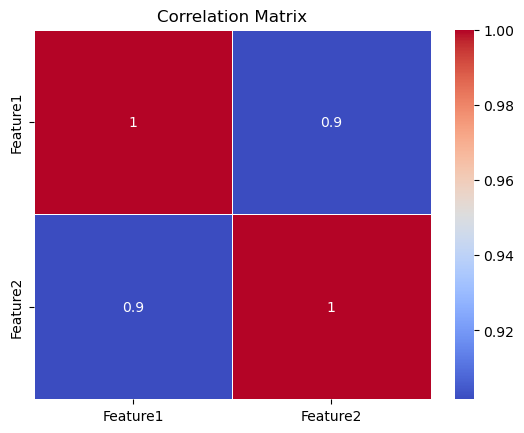

Highly correlated features: {'Feature2'}


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data with two correlated features
np.random.seed(42)
# Two random features
data = np.random.rand(100, 2)  
data[:, 1] = 2 * data[:, 0] + np.random.rand(100)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")

plt.show()

# Identify and print features with a high correlation threshold
high_corr_threshold = 0.8
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features:", highly_correlated_features)

### Ans 8

Distance measurements are crucial for determining feature similarity or dissimilarity in various machine learning and data analysis tasks. Common distance metrics include:

1. **Euclidean Distance:** The straight-line distance between two data points in Euclidean space. It is computed as the square root of the sum of squared differences between corresponding feature values.

2. **Manhattan Distance:** The sum of absolute differences between corresponding feature values, often used in grid-based scenarios.

3. **Cosine Similarity:** Measures the cosine of the angle between two feature vectors, indicating the similarity in direction. Often used for text and high-dimensional data.

4. **Jaccard Similarity:** Used for sets, it measures the size of the intersection of two sets divided by the size of their union, commonly used in text analysis and recommendation systems.

5. **Hamming Distance:** Measures the number of differing elements in binary data, often used in genetics and error correction.

6. **Minkowski Distance:** A generalization of both Euclidean and Manhattan distances, with a parameter 'p' controlling the distance type.

In this example, we compute the Euclidean distance and Cosine similarity between two feature vectors, 'vector1' and 'vector2,' using scikit-learn's distance calculation functions. These distance metrics are fundamental for various applications, such as clustering, recommendation systems, and similarity search.

In [10]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

# Sample feature vectors
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

# Calculate Euclidean distance
euclidean_dist = euclidean_distances(vector1.reshape(1, -1), vector2.reshape(1, -1))
print("Euclidean Distance:", euclidean_dist[0][0])

# Calculate Cosine similarity (1 - Cosine distance)
cosine_sim = cosine_similarity(vector1.reshape(1, -1), vector2.reshape(1, -1))
print("Cosine Similarity:", cosine_sim[0][0])

Euclidean Distance: 5.196152422706632
Cosine Similarity: 0.9746318461970762


### Ans 9

Euclidean and Manhattan distances are two commonly used distance metrics in machine learning and data analysis, and they differ in how they measure distance between data points:

1. **Euclidean Distance:**
   - Measures the straight-line (shortest) distance between two points in Euclidean space.
   - Computed as the square root of the sum of squared differences between corresponding coordinates.
   - Emphasizes the magnitude and direction of differences.
   - Sensitive to variations in all dimensions.

2. **Manhattan Distance:**
   - Also known as L1 distance or taxicab distance.
   - Measures the sum of absolute differences between corresponding coordinates.
   - Only considers horizontal and vertical movements, like navigating city blocks.
   - Less sensitive to outliers and variations in a single dimension.

In this example, we calculate the Euclidean and Manhattan distances between two points, 'point1' and 'point2,' and observe how they differ in their measurement of distance.

In [11]:
import numpy as np
from scipy.spatial import distance

point1 = np.array([1, 2])
point2 = np.array([4, 6])

# Euclidean Distance
euclidean_dist = distance.euclidean(point1, point2)

# Manhattan Distance
manhattan_dist = distance.cityblock(point1, point2)

print("Euclidean Distance:", euclidean_dist)
print("Manhattan Distance:", manhattan_dist)

Euclidean Distance: 5.0
Manhattan Distance: 7


### Ans 10

**Feature Transformation:** Feature transformation involves altering the representation of the original features to create new features. This can include techniques like scaling, normalization, or creating new features through mathematical operations like log transforms, polynomial features, or Principal Component Analysis (PCA). Feature transformation modifies the existing features and retains all or most of them in the dataset.

**Feature Selection:** Feature selection, on the other hand, focuses on choosing a subset of the most relevant features from the original set. It aims to identify and keep the most informative features while discarding irrelevant or redundant ones. Feature selection techniques include filter methods (e.g., based on statistical tests), wrapper methods (e.g., using model performance), and embedded methods (e.g., algorithms that inherently select features). Feature selection reduces dimensionality and simplifies models.

In this example, feature transformation involves standardization, while feature selection uses the chi-squared test to select the top 2 features from the original dataset.

In [12]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Feature Transformation: Standardization
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

# Feature Selection: Select the top 2 features using chi-squared test
selector = SelectKBest(score_func=chi2, k=2)
X_selected = selector.fit_transform(X, y)

print("Original Data Shape:", X.shape)
print("Transformed Data Shape:", X_transformed.shape)
print("Selected Data Shape:", X_selected.shape)

Original Data Shape: (150, 4)
Transformed Data Shape: (150, 4)
Selected Data Shape: (150, 2)


### Ans 11

1. **SVD (Singular Value Decomposition):** SVD is a matrix factorization technique used in dimensionality reduction and data compression. It decomposes a matrix into three matrices to identify underlying patterns. It's applied in recommendation systems, image compression, and text analysis.

   ```python
   import numpy as np
   from scipy.linalg import svd

   # Perform SVD on a matrix 'A'
   U, S, VT = svd(A)
   ```

2. **Collection of Features Using a Hybrid Approach:** This refers to combining multiple feature selection methods to identify the most relevant features. It often involves a mix of filter, wrapper, and embedded techniques to improve feature selection results.

3. **The Width of the Silhouette:** Silhouette width measures the separation between clusters in a clustering algorithm. A higher width indicates better-defined clusters. The width ranges from -1 to 1, with higher values indicating better clustering.

4. **Receiver Operating Characteristic Curve (ROC Curve):** ROC curve is used to evaluate binary classification models. It plots the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). AUC (Area Under the Curve) summarizes the ROC curve's performance.

   ```python
   from sklearn.metrics import roc_curve, roc_auc_score

   fpr, tpr, thresholds = roc_curve(y_true, y_scores)
   auc = roc_auc_score(y_true, y_scores)
   ```